# Data Cleaning 

### From Kaggle Kernels:
#### Extensive Sberbank Exploratory Analysis:
**source:** https://www.kaggle.com/captcalculator/a-very-extensive-sberbank-exploratory-analysis/comments#latest-185178

* 37 observations where life_sq is greater than full_sq.
* A vast majority of the apartments have three rooms or less.
* Look to see how life sq ~ price changes based on sub-area or distance to kremlin
* Home price does seem to increase with population density.
* There does not appear to be a relationship between the mean home price in a district and the district’s share of working age population.
* Surprisingly, there is little to no correlation between price and the school variables. The school variables however are highly correlated with each other, indicating that we would not want to use all of them in a linear regression model due to multicollinearity.
* homes with >3 top 20 universities show signs of correlation, but only one house fits that description.
* raions that have a top 25 cultural object have a median home sale price that is higher by 1.2 million (using this feature as a factor)
* strong positive correlation between sport_objects_raion and price_doc

#### Simple Exploration Notebook - Sberbank
**source:** https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-sberbank/comments/notebook

* overall increasing trend in price as floor_num increases. A sudden increase in the house price is also observed at floor 18.
* Individual houses seems to be costlier, check price of 0 floor houses.

#### Map visualizations with external shapefile
**source:** https://www.kaggle.com/jtremoureux/map-visualizations-with-external-shapefile/notebook

* replace regions with map shapefile coordinates



## Import Libraries & Data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from datetime import datetime

# load dataset
train_df = pd.read_csv("../Sberbank/train.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)
test_df = pd.read_csv("../Sberbank/test.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)
macro_df = pd.read_csv("../Sberbank/macro.csv", parse_dates=['timestamp'], index_col=False, low_memory=False)

### Merge Train & Test

In [2]:
frames = [train_df, test_df]

df = pd.concat(frames)

### Add Macro

In [3]:
# add macro data to train/test data

train_df = pd.merge(train_df, macro_df, how='left', on='timestamp')
test_df = pd.merge(test_df, macro_df, how='left', on='timestamp')

df = pd.merge(df, macro_df, how='left', on='timestamp')

## Manual Imputing/Removal of Observations:

In [4]:
# np.sum(df['build'].isnull())

### Build Year & State

In [5]:
df.shape

(38133, 391)

In [6]:
df.loc[df['full_sq'] == 0]

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm
17932,900,435,465,1150,553,597,489,236,254,2155,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
24296,506,245,261,646,311,336,275,133,143,3796,...,NaN,10311.0,NaN,0.44784,NaN,398451.0,28.2,NaN,46080.0,229294.8
30935,3681,1787,1894,4724,2283,2441,2041,976,1065,7467,...,NaN,10805.0,NaN,0.45888,NaN,463938.0,NaN,NaN,NaN,234576.9


In [7]:
# Cleaning values with incorrect information 
df.loc[df['state'] == 33, 'state'] = 3
df = df.loc[df['id'] != 24718] 
df = df.loc[df['floor'] != 0] 

df.loc[df['build_year'] == 20052009, 'build_year'] = 2009
df.loc[df['build_year'] == 215, 'build_year'] = 2015
df.loc[df['build_year'] == 4965, 'build_year'] = 1965
df.loc[df['build_year'] == 1691, 'build_year'] = 1961
# df.loc[df['build_year'] == 0, 'build_year'] = df['year']
# df.loc[df['build_year'] == 1, 'build_year'] = df['year']
# df.loc[df['build_year'] == 2, 'build_year'] = df['year']
# df.loc[df['build_year'] == 3, 'build_year'] = df['year']
df.loc[df['build_year'] == 20, 'build_year'] = np.nan
df.loc[df['build_year'] == 71, 'build_year'] = np.nan

df.loc[df['build_year'] < 1800, 'build_year'] = np.nan
df.loc[13120, 'build_year'] = 1970 # entered under kitch-sq column
df.loc[11523, 'kitch_sq'] = df.loc[11523, 'kitch_sq'] / 100
rows = (df['kitch_sq'] > df['full_sq']) & (df['kitch_sq'] > 100)
df.loc[rows, 'kitch_sq'] = np.nan 

In [8]:
# set rows where rows where full_sq and life_sq are both 0 to null.

df.loc[(df['full_sq'] == 0) | (df['life_sq'] == 0), ['full_sq', 'life_sq']] = np.nan

### Material

In [9]:
# Assign to nan as there is only one observation in both train and test sets.

df.loc[df['material'] == 3, 'material'] = np.nan

### Max Floor

In [10]:
df.loc[df['max_floor'] == 117, 'max_floor'] = 17
df.loc[df['max_floor'] > 60, 'max_floor'] = np.nan

### Floor 

In [11]:
df.loc[df['floor'] == 77, 'floor'] = 7

### Unit Size 

In [12]:
df.loc[df['full_sq'] > 1000, 'full_sq'] = df.loc[df['full_sq'] > 1000, 'full_sq']/100
df.loc[df['full_sq'] > 310, 'full_sq'] = df.loc[df['full_sq'] > 310, 'full_sq']/10

In [13]:
df.loc[df['full_sq'] > 1000]

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,provision_retail_space_modern_sqm,turnover_catering_per_cap,theaters_viewers_per_1000_cap,seats_theather_rfmin_per_100000_cap,museum_visitis_per_100_cap,bandwidth_sports,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm


In [14]:
# life_sq : adjust for large life_sq and that is greater than full_sq

rows = (df['full_sq'] < df['life_sq']) & (df['life_sq'] > 100)
df.loc[rows, 'life_sq'] = df.loc[rows, 'life_sq'] / 10

In [15]:
# full_sq (test)

df.loc[df['full_sq'] > 400, 'full_sq'] = df.loc[df['full_sq'] > 400, 'full_sq'] / 10

In [16]:
# life_sq (test) : fix for large life_sq and which is greater than full_sq

df.loc[rows, 'life_sq'] = df.loc[rows, 'life_sq'] / 10

### Number of Rooms

In [17]:
df.loc[df['num_room'] > 9, 'num_room'] = np.nan

## Median/Mean/Mode Imputation

In [18]:
# # replace 0 full_sq with mode of full_sq

# df.loc[df['full_sq'] == 0, 'full_sq'] = df['full_sq'].mode()[0]

# # for full_sq greater than mean of life_sq and life_sq 0, replace by mean of life_sq

# lsq_r1 = (df['life_sq'] == 0) & (df['full_sq'] > lsq_mean)
# df.loc[lsq_r1, 'life_sq'] = round(df['life_sq'].mean(),1)

# # for full_sq greater than mean of life_sq and life_sq nan, replace with mean of life_sq

# lsq_r2 = (df['life_sq'].isnull()) & (df['full_sq'] > lsq_mean )
# df.loc[lsq_r2, 'life_sq'] = round(df['life_sq'].mean(),1)

# # full_sq less than mean life_sq and life_sq nan, replace with (mean-10) life_sq 

# lsq_r3 = (df['life_sq'].isnull()) & (df['full_sq'] < lsq_mean )
# df.loc[lsq_r3, 'life_sq'] = lsq_mean - 10

In [19]:
df.loc[df['max_floor'] == 0, 'max_floor'] = df['max_floor'].mode()[0]
df.loc[df['material'].isnull(), 'material'] = df['material'].mode()[0]
df.loc[df['num_room'].isnull(), 'num_room'] = df['num_room'].mode()[0]
df.loc[df['kitch_sq'] == 0, 'kitch_sq'] = df['kitch_sq'].mode()[0]
df.loc[df['kitch_sq'].isnull(), 'kitch_sq'] = df['kitch_sq'].mode()[0]

## Creating New Features

### Add Date/Time 

In [20]:
# add month, day, year to train and test data
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['year'] = df['timestamp'].dt.year

# Add month-year
month_year = (df.timestamp.dt.month + df.timestamp.dt.year * 100)
month_year_map = month_year.value_counts().to_dict()
df['month_year'] = month_year.map(month_year_map)


# Add week-year count
week_year = (df.timestamp.dt.weekofyear + df.timestamp.dt.year * 100)
week_year_map = week_year.value_counts().to_dict()
df['week_year'] = week_year.map(week_year_map)


# Add month and day-of-week
df['month'] = df.timestamp.dt.month
df['dow'] = df.timestamp.dt.dayofweek

In [21]:
df['age'] = df['year'] - df['build_year']
df.loc[df['age'] < 0, 'age'] = 0

In [22]:
df['build_year'].describe()

count    22017.000000
mean      1986.261707
std         21.205320
min       1860.000000
25%       1969.000000
50%       1983.000000
75%       2008.000000
max       2019.000000
Name: build_year, dtype: float64

In [23]:
df.loc[df['age'] < 0].groupby('age').count()

,0_13_all,0_13_female,0_13_male,0_17_all,0_17_female,0_17_male,0_6_all,0_6_female,0_6_male,16_29_all,...,population_reg_sports_share,students_reg_sports_share,apartment_build,apartment_fund_sqm,month,day,year,month_year,week_year,dow
age,,,,,,,,,,,,,,,,,,,,,


### Price:

In [24]:
df['price_doc_log'] = np.log1p(df['price_doc'])
df['price_doc_log10'] = np.log10(df['price_doc'])

### Unit Size:

In [25]:
# squared and square root of full sq
df['full_sq^2'] = np.square(df['full_sq'])
df['full_sqrt'] = np.sqrt(df['full_sq'])
df['life_sq^2'] = np.square(df['life_sq'])
df['life_sqrt'] = np.sqrt(df['life_sq'])



# floor ratios
df['rel_floor'] = df['floor'] / df['max_floor'].astype(float)
df['rel_kitch_sq'] = df['kitch_sq'] / df['full_sq'].astype(float)


# area and population density
df['area_km'] = df['area_m'] / 1000000
df['density'] = df['raion_popul'] / df['area_km']


# working population
df['work_share'] = df['work_all'] / df['raion_popul']

## Adding Lags and calculating deltas

#### Create lag timestamps for one month, three months, 6 months, and 12 months.

In [26]:
df['one_month_lag'] = df['timestamp'] - pd.to_timedelta('30 days')
df['three_month_lag'] = df['timestamp'] - pd.to_timedelta('90 days')
df['six_month_lag'] = df['timestamp'] - pd.to_timedelta('180 days')
df['twelve_month_lag'] = df['timestamp'] - pd.to_timedelta('360 days')

In [27]:
# df[['timestamp', 'one_month_lag', 'three_month_lag', 'six_month_lag', 'twelve_month_lag']]

### Join macro features with chosen delay intervals

In [28]:
lag_features = ['timestamp' ,'oil_urals', 'gdp_quart',
                'cpi', 'usdrub', 'micex_cbi_tr', 'labor_force']
# 1-month lag
df = pd.merge(df, macro_df[lag_features], how = 'left', left_on='one_month_lag', right_on='timestamp', suffixes=('','_1'))
# 3-month lag
df = pd.merge(df, macro_df[lag_features], how = 'left', left_on='three_month_lag', right_on='timestamp', suffixes=('','_3'))
# 6 month lag
df = pd.merge(df, macro_df[lag_features], how = 'left', left_on='six_month_lag', right_on='timestamp', suffixes=('','_6'))
# 12 month lag
df = pd.merge(df, macro_df[lag_features], how = 'left', left_on='twelve_month_lag', right_on='timestamp', suffixes=('','_12'))

### Deltas:

### Oil:

In [29]:
df['delta_oil_1'] = (df['oil_urals'] - df['oil_urals_1']) / df['oil_urals']
df['delta_oil_3'] = (df['oil_urals'] - df['oil_urals_3']) / df['oil_urals']
df['delta_oil_6'] = (df['oil_urals'] - df['oil_urals_6']) / df['oil_urals']
df['delta_oil_12'] = (df['oil_urals'] - df['oil_urals_12']) / df['oil_urals']

### Currency

In [30]:
df['delta_usdrub_1'] = (df['usdrub'] - df['usdrub_1']) / df['usdrub']
df['delta_usdrub_3'] = (df['usdrub'] - df['usdrub_3']) / df['usdrub']
df['delta_usdrub_6'] = (df['usdrub'] - df['usdrub_6']) / df['usdrub']
df['delta_usdrub_12'] = (df['usdrub'] - df['usdrub_12']) / df['usdrub']

### Labor Force

In [31]:
df['delta_labor_force_1'] = (df['labor_force'] - df['labor_force_1']) / df['labor_force']
df['delta_labor_force_3'] = (df['labor_force'] - df['labor_force_3']) / df['labor_force']
df['delta_labor_force_6'] = (df['labor_force'] - df['labor_force_6']) / df['labor_force']
df['delta_labor_force_12'] = (df['labor_force'] - df['labor_force_12']) / df['labor_force']

# micex_rgbi_tr

In [32]:
df['micex_rgbi_tr_1'] = (df['labor_force'] - df['labor_force_1']) / df['labor_force']
df['micex_rgbi_tr_3'] = (df['labor_force'] - df['labor_force_3']) / df['labor_force']
df['micex_rgbi_tr_6'] = (df['labor_force'] - df['labor_force_6']) / df['labor_force']
df['micex_rgbi_tr_12'] = (df['labor_force'] - df['labor_force_12']) / df['labor_force']

count    22017.000000
mean        28.241859
std         20.990004
min          0.000000
25%          7.000000
50%         32.000000
75%         46.000000
max        155.000000
Name: age, dtype: float64

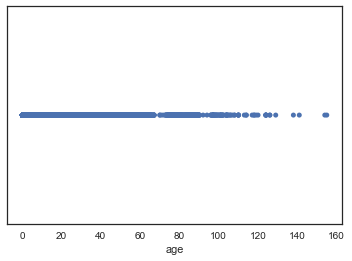

In [33]:
import seaborn as sns
from matplotlib import pyplot as plt

sns.set(style="white", color_codes=True)

%matplotlib inline

# grid = sns.JointGrid(x, y, space=0, size=12, ratio=50)

sns.stripplot(df['age'])
df['age'].describe()

## Functions for Scaling/Normalizing/Reshaping
 (Note: not necessary for Random Forest Models)

#### Check dtypes and split objects and numeric types

In [34]:
df_numerics = df.select_dtypes(exclude=['object','datetime'])
df_objects = df.select_dtypes(include=['object'])
df_timestamp = df.select_dtypes(include=['datetime'])

### Merge again

In [35]:
frames = [df_timestamp, df_numerics, df_objects]

df = pd.concat(frames,axis=1)

In [36]:
df.shape

(38123, 457)

#### Normalize and rescale numeric features

In [608]:
# df_numerics.loc[:, df_numerics.columns != 'timestamp'] = df_numerics.select_dtypes(exclude=['datetime'])

### Standardize and remove outliers 

First, encode categorical variables using: `LabelEncoder()`

In [37]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

for feature in df.columns:
    if df[feature].dtype=='object':
        lbl = LabelEncoder()
        lbl.fit(list(df[feature].values)) 
        df[feature] = lbl.transform(list(df[feature].values))
    elif df[feature].dtype=='float64':
        scl = RobustScaler()
        scl.fit(df.loc[df[feature].notnull(), feature].values)
        df.loc[df[feature].notnull(), feature] = scl.transform(df.loc[df[feature].notnull(), feature].values)

#### Confirm data's status before saving

In [38]:
np.sum(df['price_doc_log'].isnull())

7662

### Save to CSV

In [40]:
df.to_csv('./cleaned_df_no_scaling_or_outlier_removal_{0}.csv'.format(datetime.date(datetime.now())), index=False)

In [47]:
# df_numerics['timestamp']

In [49]:
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder

for feature in df_numerics.columns:
    scl = RobustScaler()
    scl.fit(df.loc[df_numerics[feature].notnull(), feature].values)
    df.loc[df_numerics[feature].notnull(), feature] = scl.transform(df_numerics.loc[df_numerics[feature].notnull(), feature].values)

/Users/rezarad/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/rezarad/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:1008: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/rezarad/anaconda2/lib/python2.7/site-packages/sklearn/preprocessing/data.py:986: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1

{'boxes': [<matplotlib.lines.Line2D at 0x11215fdd0>],
 'caps': [<matplotlib.lines.Line2D at 0x11216fcd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11217afd0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11217a990>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11215ff50>,
  <matplotlib.lines.Line2D at 0x11216f690>]}

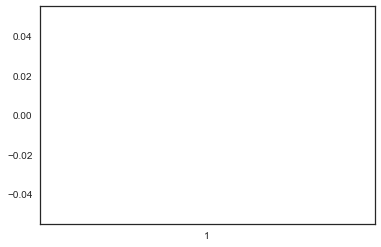

In [54]:
plt.boxplot(df_numerics['price_doc'])